In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train= pd.read_csv('/Train_Data.csv')

In [3]:
test= pd.read_csv('/Test_Data.csv')

In [4]:
train = train.drop('Mental health management', axis=1)
test =test.drop('Mental health management', axis=1)

In [5]:
train = train.drop('Any heriditary condition?', axis=1)
test =test.drop('Any heriditary condition?', axis=1)

In [6]:
train = train.drop(['ID1', 'ID2'], axis=1)

test = test.drop(['ID1', 'ID2'], axis=1)

In [7]:
from sklearn.impute import KNNImputer

binary_columns = ["Taking supplements", "Social interaction", "Alcohol consumption",
                  "Regular sleeping hours", "Physical activity", "Follow Diet", "Illness count last year"]

# Perform KNN imputation for binary columns
binary_data = train[binary_columns].copy()
imputer = KNNImputer(n_neighbors=5)
imputed_binary_data = pd.DataFrame(imputer.fit_transform(binary_data), columns=binary_columns)

# Perform mode imputation for "Food preference" column
food_pref_mode = train["Food preference"].mode().values[0]
imputed_food_pref = train["Food preference"].fillna(food_pref_mode)

# Update the original DataFrame with the imputed values
train[binary_columns] = imputed_binary_data
train["Food preference"] = imputed_food_pref


In [8]:


# Assuming your DataFrame is named 'train'
food_pref_cols = ['DX1', 'DX3', 'DX4', 'DX2', 'DX5', 'DX6']

# Create separate columns for each category
for col in food_pref_cols:
    train[col] = train['Food preference'].apply(lambda x: int(col in x.split()))

# Drop the original 'Food preference' column
train.drop('Food preference', axis=1, inplace=True)

In [9]:
import numpy as np
from sklearn.impute import KNNImputer

train["Smoker"] = train["Smoker?"].replace({"YES": 0, "NO": 1, "Cannot say": np.nan})

# Drop the original "Smoker?" column
train.drop("Smoker?", axis=1, inplace=True)

# Perform KNN imputation to fill null values
imputer = KNNImputer(n_neighbors=5)
train["Smoker"] = imputer.fit_transform(train[["Smoker"]])

# One-hot encoding for "Living in" column
living_in_encoding = pd.get_dummies(train["Living in?"], prefix="Living in?")
train = pd.concat([train, living_in_encoding], axis=1)



In [10]:
train.isnull().sum()

Specific ailments          0
Age                        0
BMI                        0
Living in?                 0
Follow Diet                0
Physical activity          0
Regular sleeping hours     0
Alcohol consumption        0
Social interaction         0
Taking supplements         0
Illness count last year    0
Healthy                    0
DX1                        0
DX3                        0
DX4                        0
DX2                        0
DX5                        0
DX6                        0
Smoker                     0
Living in?_RURAL           0
Living in?_URBAN           0
dtype: int64

In [11]:
train = train.drop(["Living in?"], axis=1)

In [12]:
train = train.rename(columns={"Living in?_RURAL": "Rural"})
train = train.rename(columns={"Living in?_URBAN": "Urban"})


In [13]:
from sklearn.preprocessing import MinMaxScaler

# Select the columns to be scaled
columns_to_scale = ["Specific ailments", "Age", "BMI","Illness count last year"]

# Create a scaler object
scaler = MinMaxScaler()

# Fit the scaler on the selected columns
scaler.fit(train[columns_to_scale])

# Scale the selected columns in the train and test data
train[columns_to_scale] = scaler.transform(train[columns_to_scale])
test[columns_to_scale] = scaler.transform(test[columns_to_scale])

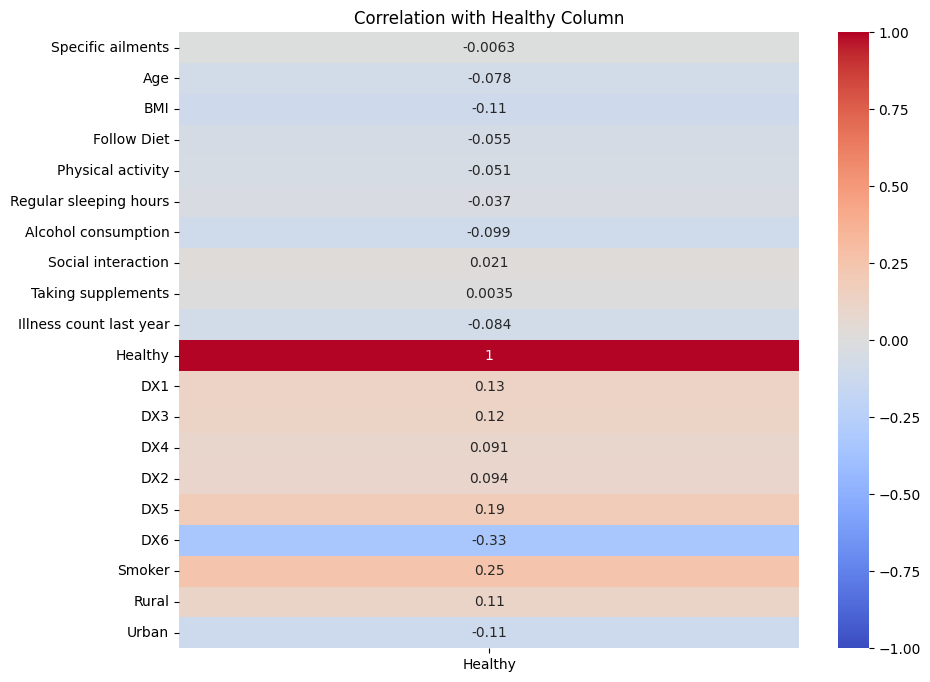

In [14]:

corr_matrix = train.corr()

# Filter correlation matrix for "Healthy" column
healthy_corr = corr_matrix["Healthy"]

# Plot correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(healthy_corr.to_frame(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation with Healthy Column")
plt.show()


In [15]:
correlation = train.corr()["Healthy"]

# Print the correlation values
print(correlation)

Specific ailments         -0.006301
Age                       -0.078278
BMI                       -0.108218
Follow Diet               -0.054691
Physical activity         -0.050798
Regular sleeping hours    -0.037366
Alcohol consumption       -0.099345
Social interaction         0.021447
Taking supplements         0.003453
Illness count last year   -0.084322
Healthy                    1.000000
DX1                        0.131608
DX3                        0.124511
DX4                        0.090985
DX2                        0.093831
DX5                        0.190920
DX6                       -0.332519
Smoker                     0.252704
Rural                      0.113920
Urban                     -0.113920
Name: Healthy, dtype: float64


In [16]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# Load the preprocessed train data into a DataFrame (assuming you have already preprocessed the data)


# Select the features and the target variable
X = train.drop("Healthy", axis=1)
y = train["Healthy"]

# Initialize the classifier for feature selection
estimator = RandomForestClassifier()

# Initialize the RFE selector with cross-validation
rfecv = RFECV(estimator=estimator, cv=StratifiedKFold(), scoring='accuracy')

# Fit the RFE selector on the training data
rfecv.fit(X, y)

# Print the optimal number of features
print("Optimal number of features: ", rfecv.n_features_)

# Get the selected feature names
selected_features = X.columns[rfecv.support_].tolist()

# Print the selected feature names
print("Selected features: ", selected_features)


Optimal number of features:  16
Selected features:  ['Specific ailments', 'Age', 'BMI', 'Follow Diet', 'Physical activity', 'Regular sleeping hours', 'Alcohol consumption', 'Social interaction', 'Illness count last year', 'DX1', 'DX3', 'DX4', 'DX5', 'DX6', 'Smoker', 'Urban']


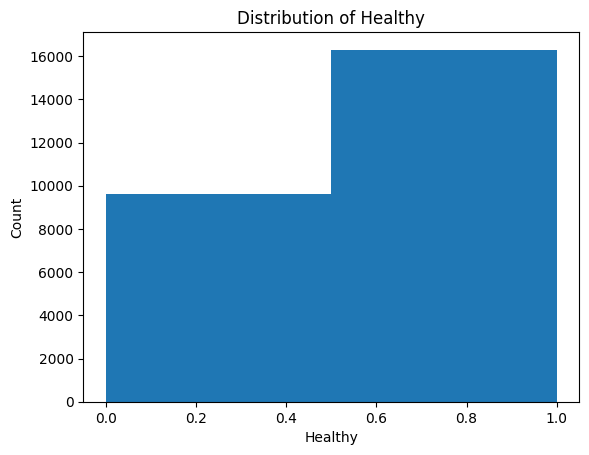

In [17]:
import matplotlib.pyplot as plt

# Plot a histogram of the "Healthy" column
plt.hist(train["Healthy"], bins=2)
plt.xlabel("Healthy")
plt.ylabel("Count")
plt.title("Distribution of Healthy")
plt.show()

In [18]:
value_counts = train["Healthy"].value_counts()
print(value_counts)


1    16300
0     9620
Name: Healthy, dtype: int64


In [19]:
target = train["Healthy"]
features = train[['Specific ailments', 'Age', 'BMI', 'Follow Diet', 'Physical activity', 'Regular sleeping hours', 'Alcohol consumption', 'Social interaction', 'Illness count last year', 'DX1', 'DX3', 'DX4', 'DX2', 'DX5', 'DX6', 'Smoker', 'Urban']]

In [20]:
from imblearn.combine import SMOTETomek
import pandas as pd

# Assuming you have imported the required libraries and loaded the dataset into 'train'

# Separate the features and target variable


# Instantiate the SMOTETomek object
smt = SMOTETomek(random_state=42)

# Perform the rebalancing
features_balanced, target_balanced = smt.fit_resample(features, target)

# Create a new balanced dataframe
balanced_data = pd.concat([features_balanced, target_balanced], axis=1)

# Print the value counts of the rebalanced target variable
print(balanced_data["Healthy"].value_counts())



1    14944
0    14944
Name: Healthy, dtype: int64


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features_balanced, target_balanced, test_size=0.2, random_state=42)

# Initialize the logistic regression model
Lr = LogisticRegression()

# Train the model
Lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = Lr.predict(X_test)

# Calculate the accuracy of the model


scores = cross_val_score(Lr, features_balanced, target_balanced, cv=3)

# Print the accuracy scores for each fold
print("Cross-Validation Accuracy Scores:", scores)

# Calculate the mean accuracy across all folds
mean_accuracy = scores.mean()
print("Mean Accuracy:", mean_accuracy)


Cross-Validation Accuracy Scores: [0.73271103 0.73311252 0.73609717]
Mean Accuracy: 0.7339735721224946


In [22]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Train the model
dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Perform three-fold cross-validation
scores = cross_val_score(dt, features_balanced, target_balanced, cv=3)

# Print the accuracy scores for each fold
print("Cross-Validation Accuracy Scores:", scores)

# Calculate the mean accuracy across all folds
mean_accuracy = scores.mean()
print("Mean Accuracy:", mean_accuracy)

Accuracy: 0.8261960521913684
Cross-Validation Accuracy Scores: [0.80568102 0.81792633 0.83667938]
Mean Accuracy: 0.8200955762782846


In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Perform three-fold cross-validation
scores = cross_val_score(rf,features_balanced, target_balanced, cv=3)

# Print the accuracy scores for each fold
print("Cross-Validation Accuracy Scores:", scores)

# Calculate the mean accuracy across all folds
mean_accuracy = scores.mean()
print("Mean Accuracy:", mean_accuracy)

Accuracy: 0.8788892606222817
Cross-Validation Accuracy Scores: [0.87042056 0.8734317  0.88676972]
Mean Accuracy: 0.8768739927640589


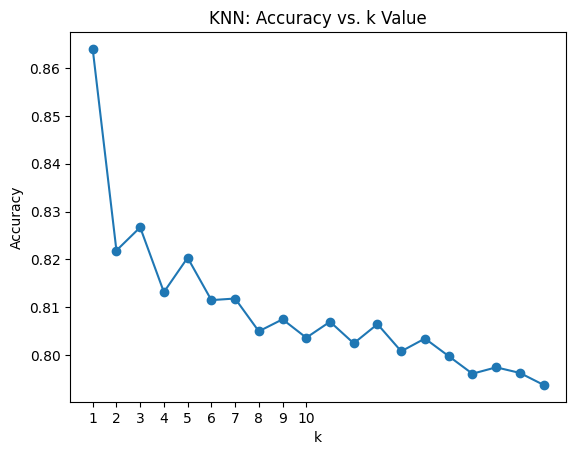

In [24]:
from sklearn.neighbors import KNeighborsClassifier


# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Initialize lists to store k values and corresponding accuracies
k_values = []
accuracies = []

# Train and evaluate KNN for different k values
for k in range(1, 21):
    knn.set_params(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    k_values.append(k)
    accuracies.append(accuracy)

# Plot the graph of k values vs. accuracies
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('KNN: Accuracy vs. k Value')
plt.xticks(np.arange(1, 11))
plt.show()








In [25]:
max_accuracy = max(accuracies)
optimal_k = k_values[accuracies.index(max_accuracy)]

print("Optimal k value:", optimal_k)
print("Max Accuracy:", max_accuracy)

Optimal k value: 1
Max Accuracy: 0.8640013382402141


In [26]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Initialize the XGBoost classifier
xgb = XGBClassifier()

# Train the model
xgb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Perform three-fold cross-validation
scores = cross_val_score(xgb, features_balanced, target_balanced, cv=3)

# Print the accuracy scores for each fold
print("Cross-Validation Accuracy Scores:", scores)

# Calculate the mean accuracy across all folds
mean_accuracy = scores.mean()
print("Mean Accuracy:", mean_accuracy)


Accuracy: 0.8800602208096353
Cross-Validation Accuracy Scores: [0.84231657 0.87001907 0.87572777]
Mean Accuracy: 0.8626878024612904


In [27]:
!pip install catboost

In [28]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Initialize the LightGBM classifier
lgbm = LGBMClassifier()

# Train the model
lgbm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lgbm.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Perform three-fold cross-validation
scores = cross_val_score(lgbm, features_balanced, target_balanced, cv=3)

# Print the accuracy scores for each fold
print("Cross-Validation Accuracy Scores:", scores)

# Calculate the mean accuracy across all folds
mean_accuracy = scores.mean()
print("Mean Accuracy:", mean_accuracy)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 11956, number of negative: 11954
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004685 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1222
[LightGBM] [Info] Number of data points in the train set: 23910, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500042 -> initscore=0.000167
[LightGBM] [Info] Start training from score 0.000167
Accuracy: 0.8685178989628638
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9962, number of negative: 9963
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004932 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is n

In [29]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Initialize the AdaBoost classifier
adaboost = AdaBoostClassifier()

# Train the model
adaboost.fit(X_train, y_train)

# Make predictions on the test set
y_pred = adaboost.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Perform three-fold cross-validation
scores = cross_val_score(adaboost, features_balanced, target_balanced, cv=3)

# Print the accuracy scores for each fold
print("Cross-Validation Accuracy Scores:", scores)

# Calculate the mean accuracy across all folds
mean_accuracy = scores.mean()
print("Mean Accuracy:", mean_accuracy)


Accuracy: 0.821344931415189
Cross-Validation Accuracy Scores: [0.82204155 0.82675901 0.81840996]
Mean Accuracy: 0.8224035066398286


In [37]:
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Initialize the CatBoost classifier
catboost = CatBoostClassifier()

# Train the model
catboost.fit(X_train, y_train)

# Make predictions on the test set
y_pred = catboost.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Perform three-fold cross-validation
scores = cross_val_score(catboost, features_balanced, target_balanced, cv=3)

# Print the accuracy scores for each fold
print("Cross-Validation Accuracy Scores:", scores)

# Calculate the mean accuracy across all folds
mean_accuracy = scores.mean()


Learning rate set to 0.039957
0:	learn: 0.6738972	total: 54.8ms	remaining: 54.7s
1:	learn: 0.6516912	total: 82.1ms	remaining: 41s
2:	learn: 0.6358764	total: 104ms	remaining: 34.6s
3:	learn: 0.6220453	total: 131ms	remaining: 32.5s
4:	learn: 0.6054037	total: 167ms	remaining: 33.3s
5:	learn: 0.5941434	total: 195ms	remaining: 32.2s
6:	learn: 0.5797452	total: 220ms	remaining: 31.1s
7:	learn: 0.5667904	total: 246ms	remaining: 30.5s
8:	learn: 0.5568788	total: 269ms	remaining: 29.6s
9:	learn: 0.5463175	total: 291ms	remaining: 28.8s
10:	learn: 0.5383147	total: 314ms	remaining: 28.2s
11:	learn: 0.5295699	total: 353ms	remaining: 29.1s
12:	learn: 0.5232124	total: 386ms	remaining: 29.3s
13:	learn: 0.5169902	total: 429ms	remaining: 30.2s
14:	learn: 0.5111424	total: 465ms	remaining: 30.5s
15:	learn: 0.5052348	total: 501ms	remaining: 30.8s
16:	learn: 0.4999622	total: 540ms	remaining: 31.2s
17:	learn: 0.4953633	total: 576ms	remaining: 31.4s
18:	learn: 0.4911407	total: 608ms	remaining: 31.4s
19:	learn: 

In [31]:
import pandas as pd
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Initialize the individual classifiers
xgb = XGBClassifier()
catboost = CatBoostClassifier()
lgbm = LGBMClassifier()
rf = RandomForestClassifier()

# Initialize the VotingClassifier with the individual classifiers
ensemble = VotingClassifier(
    estimators=[('xgb', xgb), ('catboost', catboost), ('lgbm', lgbm), ('rf', rf)],
    voting='hard'  # 'hard' for majority voting, 'soft' for weighted voting
)

# Train the ensemble model
ensemble.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ensemble.predict(X_test)

# Calculate the accuracy of the ensemble model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Perform three-fold cross-validation on the ensemble model
scores = cross_val_score(ensemble, features_balanced, target_balanced, cv=3)

# Print the accuracy scores for each fold
print("Cross-Validation Accuracy Scores:", scores)

# Calculate the mean accuracy across all folds
mean_accuracy = scores.mean()
print("Mean Accuracy:", mean_accuracy)


Learning rate set to 0.039957
0:	learn: 0.6738972	total: 23.9ms	remaining: 23.8s
1:	learn: 0.6516912	total: 46.9ms	remaining: 23.4s
2:	learn: 0.6358764	total: 84.8ms	remaining: 28.2s
3:	learn: 0.6220453	total: 109ms	remaining: 27.1s
4:	learn: 0.6054037	total: 124ms	remaining: 24.7s
5:	learn: 0.5941434	total: 136ms	remaining: 22.5s
6:	learn: 0.5797452	total: 147ms	remaining: 20.9s
7:	learn: 0.5667904	total: 165ms	remaining: 20.4s
8:	learn: 0.5568788	total: 175ms	remaining: 19.3s
9:	learn: 0.5463175	total: 186ms	remaining: 18.4s
10:	learn: 0.5383147	total: 196ms	remaining: 17.6s
11:	learn: 0.5295699	total: 210ms	remaining: 17.3s
12:	learn: 0.5232124	total: 221ms	remaining: 16.8s
13:	learn: 0.5169902	total: 233ms	remaining: 16.4s
14:	learn: 0.5111424	total: 244ms	remaining: 16s
15:	learn: 0.5052348	total: 256ms	remaining: 15.7s
16:	learn: 0.4999622	total: 272ms	remaining: 15.7s
17:	learn: 0.4953633	total: 294ms	remaining: 16.1s
18:	learn: 0.4911407	total: 318ms	remaining: 16.4s
19:	learn: